# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [1636]:
# import pandas module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# creating Students dataframe
students = pd.read_csv("Students.csv")

# creating Attendance dataframe
attendance = pd.read_csv("Attendance.csv")

# creating Grades dataframe
grades = pd.read_csv("Grades.csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [1637]:
# Checking for nulls in Students df
students.isnull().sum()


ContactID             0
Created               0
Updated               0
Location              0
Campaign             58
Program               0
SubFaculty            0
ProgramType           0
Status                0
StartDate             0
EndDate               0
LDA                   0
TerminationDate      29
Gender                0
BirthDate             0
EducationLevel        0
Postal                0
TestScore          1064
WonderlicScore        0
PrimaryFunder         0
NetRevenue            0
dtype: int64

In [1638]:
# Checking datatypes in Students df
students.dtypes

ContactID            int64
Created             object
Updated             object
Location            object
Campaign            object
Program             object
SubFaculty          object
ProgramType         object
Status              object
StartDate           object
EndDate             object
LDA                 object
TerminationDate     object
Gender              object
BirthDate           object
EducationLevel      object
Postal              object
TestScore          float64
WonderlicScore      object
PrimaryFunder       object
NetRevenue         float64
dtype: object

In [1639]:
# Checking what data is in WonderlicScore, because it should be the same as TestScore,
# yet there are no nulls and it's a string type
students['WonderlicScore']

0                20
1                22
2                19
3                23
4                21
           ...     
1724           N.A.
1725    25 A1 Timed
1726           N.A.
1727           N.A.
1728    21 A1 Timed
Name: WonderlicScore, Length: 1729, dtype: object

In [1640]:
# Creating new Student dataframe, removing non-numeric characters from 
# WonderlicScore and converting to numeric (also changes N.A. to null)
students_c = students.copy(deep=True)
students_c['WonderlicScore'] = students_c.WonderlicScore.str.replace(r'[^0-9]+', '').str[:2]
students_c['WonderlicScore'] = pd.to_numeric(students_c['WonderlicScore'])
students_c['WonderlicScore']


C:\Users\JennyShults\AppData\Local\Temp\ipykernel_13220\2739205780.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  students_c['WonderlicScore'] = students_c.WonderlicScore.str.replace(r'[^0-9]+', '').str[:2]


0       20.0
1       22.0
2       19.0
3       23.0
4       21.0
        ... 
1724     NaN
1725    25.0
1726     NaN
1727     NaN
1728    21.0
Name: WonderlicScore, Length: 1729, dtype: float64

In [1641]:
# Checking for nulls in new Students_c df
students_c.isnull().sum()

ContactID             0
Created               0
Updated               0
Location              0
Campaign             58
Program               0
SubFaculty            0
ProgramType           0
Status                0
StartDate             0
EndDate               0
LDA                   0
TerminationDate      29
Gender                0
BirthDate             0
EducationLevel        0
Postal                0
TestScore          1064
WonderlicScore      438
PrimaryFunder         0
NetRevenue            0
dtype: int64

In [1642]:
# Dealing with TestScore/Wonderlic nulls -- WonderlicScore is the same as TestScore, 
# so I'm merging the data into a new column called EntranceExam
students_c['EntranceExam'] = students_c['TestScore'].fillna(students_c['WonderlicScore'])
students_c['EntranceExam']

0       20.0
1       22.0
2       19.0
3       23.0
4       21.0
        ... 
1724    15.0
1725    25.0
1726    18.0
1727    16.0
1728    21.0
Name: EntranceExam, Length: 1729, dtype: float64

In [1643]:
# Checking for nulls in EntranceExam (will deal with at visualization time)
students_c.EntranceExam.isnull().sum()

177

In [1644]:
# Checking for nulls in Attendance df
attendance.isnull().sum()


AttendanceId           0
Created                0
Updated                0
ContactID            225
IntakeEventId        371
AttendanceDate         0
Status                 0
Notes             122564
StartTime              3
EndTime                2
dtype: int64

In [1645]:
# Creating new Attendance dataframe and removing attendance records with
# null values for ContactID, as I won't be able to match them to a student
attendance_c = attendance.copy(deep=True)
attendance_c = attendance_c[~attendance_c['ContactID'].isnull()]
attendance_c.isnull().sum()

AttendanceId           0
Created                0
Updated                0
ContactID              0
IntakeEventId        367
AttendanceDate         0
Status                 0
Notes             122343
StartTime              3
EndTime                2
dtype: int64

In [1646]:
# Removing attendance records with null values for Start Time, as I won't 
# be able to calculate hours (also takes care of null values for End Time)
attendance_c = attendance_c[~attendance_c['StartTime'].isnull()]
attendance_c.isnull().sum()

AttendanceId           0
Created                0
Updated                0
ContactID              0
IntakeEventId        367
AttendanceDate         0
Status                 0
Notes             122340
StartTime              0
EndTime                0
dtype: int64

In [1647]:
# Checking for nulls in Grades df
grades.isnull().sum()

GradeID         0
Created         0
Updated         0
ContactID      20
CourseID        0
CourseName      0
Score         118
dtype: int64

In [1648]:
# Creating new Grades dataframe and removing grade records with null
# values for ContactID, as I won't be able to match them to a student
grades_c = grades.copy(deep=True)
grades_c = grades_c[~grades_c['ContactID'].isnull()]
grades_c.isnull().sum()

GradeID         0
Created         0
Updated         0
ContactID       0
CourseID        0
CourseName      0
Score         113
dtype: int64

In [1649]:
# Removing grade records with null values for score
grades_c = grades_c[~grades_c['Score'].isnull()]
grades_c.isnull().sum()

GradeID       0
Created       0
Updated       0
ContactID     0
CourseID      0
CourseName    0
Score         0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<AxesSubplot: title={'center': 'Entrance Exam Score Distribution'}, ylabel='Frequency'>

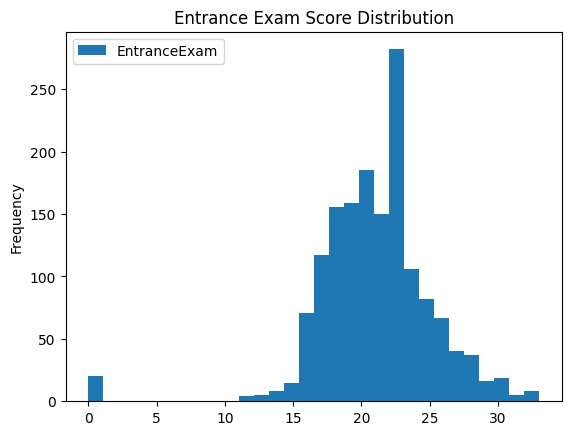

In [1650]:
# Plotting a histogram on Students_c EntranceExam field to see if there are outliers. 
# Max score is 40, typical score is 15-25.
students_c[['EntranceExam']].plot.hist(bins = 30, title = 'Entrance Exam Score Distribution')

In [1651]:
# Changing outliers (including zeroes) to null for EntranceExam
students_c.loc[(students_c.EntranceExam > 40) | (students_c.EntranceExam == 0), 'EntranceExam'] = None

In [1652]:
# Checking Min to see that there are no zeroes
students_c.EntranceExam.min()

12.0

<AxesSubplot: title={'center': 'Grades Distribution'}, ylabel='Frequency'>

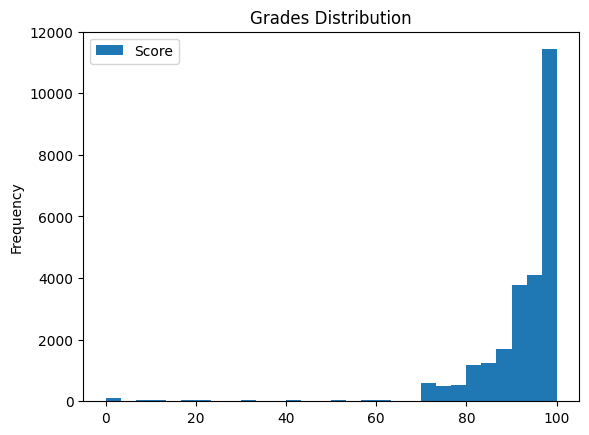

In [1653]:
# Plotting a histogram on Grades_c Scores field to see if there are outliers. 
# Range should be 0-100.
grades_c[['Score']].plot.hist(bins = 30, title = 'Grades Distribution')

In [1654]:
# Fixing 1/1/1900 dates in Updated column across all three dataframes
students_c.loc[(students_c.Updated == '1/1/1900 12:00:00 AM'), 'Updated'] = students_c['Created']
attendance_c.loc[(attendance_c.Updated == '1/1/1900 12:00:00 AM'), 'Updated'] = attendance_c['Created']
grades_c.loc[(grades_c.Updated == '1/1/1900 12:00:00 AM'), 'Updated'] = grades_c['Created']

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [1655]:
students_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ContactID        1729 non-null   int64  
 1   Created          1729 non-null   object 
 2   Updated          1729 non-null   object 
 3   Location         1729 non-null   object 
 4   Campaign         1671 non-null   object 
 5   Program          1729 non-null   object 
 6   SubFaculty       1729 non-null   object 
 7   ProgramType      1729 non-null   object 
 8   Status           1729 non-null   object 
 9   StartDate        1729 non-null   object 
 10  EndDate          1729 non-null   object 
 11  LDA              1729 non-null   object 
 12  TerminationDate  1700 non-null   object 
 13  Gender           1729 non-null   object 
 14  BirthDate        1729 non-null   object 
 15  EducationLevel   1729 non-null   object 
 16  Postal           1729 non-null   object 
 17  TestScore     

In [1656]:
# Dropping TestScore and WonderlicScore columns since the EntranceExam column incorporates both
students_c.drop(['TestScore', 'WonderlicScore'], axis=1, inplace=True)
students_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ContactID        1729 non-null   int64  
 1   Created          1729 non-null   object 
 2   Updated          1729 non-null   object 
 3   Location         1729 non-null   object 
 4   Campaign         1671 non-null   object 
 5   Program          1729 non-null   object 
 6   SubFaculty       1729 non-null   object 
 7   ProgramType      1729 non-null   object 
 8   Status           1729 non-null   object 
 9   StartDate        1729 non-null   object 
 10  EndDate          1729 non-null   object 
 11  LDA              1729 non-null   object 
 12  TerminationDate  1700 non-null   object 
 13  Gender           1729 non-null   object 
 14  BirthDate        1729 non-null   object 
 15  EducationLevel   1729 non-null   object 
 16  Postal           1729 non-null   object 
 17  PrimaryFunder 

In [1657]:
attendance_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180263 entries, 0 to 180490
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AttendanceId    180263 non-null  int64  
 1   Created         180263 non-null  object 
 2   Updated         180263 non-null  object 
 3   ContactID       180263 non-null  float64
 4   IntakeEventId   179896 non-null  float64
 5   AttendanceDate  180263 non-null  object 
 6   Status          180263 non-null  object 
 7   Notes           57923 non-null   object 
 8   StartTime       180263 non-null  object 
 9   EndTime         180263 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 15.1+ MB


In [1658]:
# Dropping IntakeEventId and Notes columns, as they're irrelevant
attendance_c.drop(['IntakeEventId', 'Notes'], axis=1, inplace=True)
attendance_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180263 entries, 0 to 180490
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AttendanceId    180263 non-null  int64  
 1   Created         180263 non-null  object 
 2   Updated         180263 non-null  object 
 3   ContactID       180263 non-null  float64
 4   AttendanceDate  180263 non-null  object 
 5   Status          180263 non-null  object 
 6   StartTime       180263 non-null  object 
 7   EndTime         180263 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.4+ MB


In [1659]:
grades_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25624 entries, 0 to 25756
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GradeID     25624 non-null  int64  
 1   Created     25624 non-null  object 
 2   Updated     25624 non-null  object 
 3   ContactID   25624 non-null  float64
 4   CourseID    25624 non-null  int64  
 5   CourseName  25624 non-null  object 
 6   Score       25624 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [1660]:
# Changing Attendance_c ContactID to Int to match Students_c df
attendance_c['ContactID'] = attendance_c['ContactID'].astype('int')
attendance_c.ContactID

0         510165
1           8905
2           8900
3           8908
4           8871
           ...  
180486    527261
180487    526139
180488    527866
180489    528048
180490    516512
Name: ContactID, Length: 180263, dtype: int32

In [1661]:
# Changing Grades_c ContactID to Int to match Students_c df
grades_c['ContactID'] = grades_c['ContactID'].astype('int')
grades_c.ContactID

0          8796
1          8347
2          8955
3          8934
4          8932
          ...  
25752    523390
25753    523818
25754    519610
25755    528627
25756    528628
Name: ContactID, Length: 25624, dtype: int32

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

1. Yes, I did!
2. Yes, it showed me that when we transferred data from our old SIS to our new SIS, they did not validate the incoming data, so there are inconsistencies. Something to address in the future!
3. I think there will be some issues with the date formats and sorting, but I'm hopeful Tableau can handle it.